Day 100: Pruning applied. LA reduced from 5246.079 to 3672.255 m² (With Pruning)
         Extinction coefficient updated to 0.776
Day 200: Pruning applied. LA reduced from 6618.775 to 4633.143 m² (With Pruning)
         Extinction coefficient updated to 0.753
Day 300: Pruning applied. LA reduced from 6970.491 to 4879.344 m² (With Pruning)
         Extinction coefficient updated to 0.730
Day 400: Pruning applied. LA reduced from 7060.609 to 4942.426 m² (With Pruning)
         Extinction coefficient updated to 0.708
Day 500: Pruning applied. LA reduced from 7083.699 to 4958.589 m² (With Pruning)
         Extinction coefficient updated to 0.687
Day 600: Pruning applied. LA reduced from 7089.615 to 4962.730 m² (With Pruning)
         Extinction coefficient updated to 0.666
Day 700: Pruning applied. LA reduced from 7091.131 to 4963.792 m² (With Pruning)
         Extinction coefficient updated to 0.646
Day 800: Pruning applied. LA reduced from 7091.519 to 4964.063 m² (With Pruning)
         

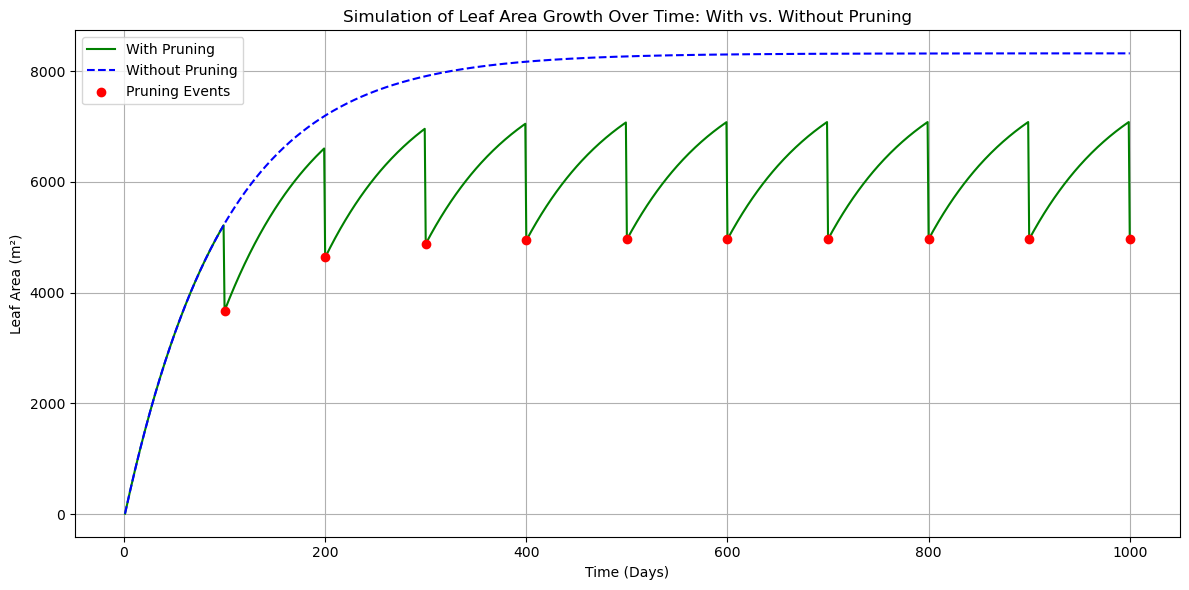

In [31]:
import math
import matplotlib.pyplot as plt

# -------------------------------
# 1. Define Parameters
# -------------------------------

# Environmental Variables (Dotted Line Parameters)
I0 = 20.0          # Incident light (e.g., MJ/m²/day)
k_initial = 0.8    # Initial Beer-Lambert extinction coefficient
A_ground = 1.0     # Ground area occupied by the plant canopy (m²)

# Model Parameters
epsilon = 0.4      # Conversion efficiency from light to biomass
r = 0.10           # Fraction of assimilation allocated to leaf area growth
mu = 0.01         # Leaf area senescence rate (fraction lost per time step)
rho = 0.30         # Fraction of leaf area removed during pruning
prune_interval = 100  # Prune every N time steps (e.g., days)
gamma = 0.1         # Fraction by which k is reduced per pruning event

# Simulation Parameters
T_max = 1000        # Total simulation time steps (e.g., days)

# -------------------------------
# 2. Initialize State Variables
# -------------------------------

LA_initial = 0.1    # Initial leaf area (m²)

# State Variables for Both Scenarios
LA_with_pruning = LA_initial    # Leaf Area with Pruning
LA_without_pruning = LA_initial # Leaf Area without Pruning

k_with = k_initial              # Extinction coefficient with pruning
k_without = k_initial           # Extinction coefficient without pruning

# Lists to store simulation data
time_steps = []
leaf_areas_with_pruning = []
leaf_areas_without_pruning = []

# -------------------------------
# 3. Simulation Loop
# -------------------------------

for t in range(1, T_max + 1):
    # --- Scenario 1: With Pruning ---
    # 3.1 Compute Leaf Area Index (LAI)
    LAI_with = LA_with_pruning / A_ground
    
    # 3.2 Compute Intercepted Light using Beer-Lambert
    I_avg_with = I0 * (1 - math.exp(-k_with * LAI_with))
    
    # 3.3 Compute Photosynthesis (Assimilation)
    A_t_with = epsilon * I_avg_with
    
    # 3.4 Compute Leaf Area Growth
    delta_LA_with = r * A_t_with - mu * LA_with_pruning
    
    # 3.5 Update Leaf Area
    LA_with_pruning += delta_LA_with
    
    # Ensure Leaf Area doesn't become negative
    LA_with_pruning = max(LA_with_pruning, 0)
    
    # 3.6 Apply Pruning at Specified Intervals
    if t % prune_interval == 0:
        LA_before_pruning = LA_with_pruning
        LA_with_pruning *= (1 - rho)
        
        # Update extinction coefficient to reflect improved light penetration
        k_with *= (1 - gamma * rho)
        
        print(f"Day {t}: Pruning applied. LA reduced from {LA_before_pruning:.3f} to {LA_with_pruning:.3f} m² (With Pruning)")
        print(f"         Extinction coefficient updated to {k_with:.3f}")
    
    # --- Scenario 2: Without Pruning ---
    # 3.1 Compute Leaf Area Index (LAI)
    LAI_without = LA_without_pruning / A_ground
    
    # 3.2 Compute Intercepted Light using Beer-Lambert
    I_avg_without = I0 * (1 - math.exp(-k_without * LAI_without))
    
    # 3.3 Compute Photosynthesis (Assimilation)
    A_t_without = epsilon * I_avg_without
    
    # 3.4 Compute Leaf Area Growth
    delta_LA_without = r * A_t_without - mu * LA_without_pruning
    
    # 3.5 Update Leaf Area
    LA_without_pruning += delta_LA_without
    
    # Ensure Leaf Area doesn't become negative
    LA_without_pruning = max(LA_without_pruning, 0)
    
    # No pruning applied in this scenario
    
    # 3.7 Store Results for Plotting
    time_steps.append(t)
    leaf_areas_with_pruning.append(LA_with_pruning)
    leaf_areas_without_pruning.append(LA_without_pruning)

# -------------------------------
# 4. Plot the Results
# -------------------------------

plt.figure(figsize=(12, 6))
plt.plot(time_steps, leaf_areas_with_pruning, label='With Pruning', color='green')
plt.plot(time_steps, leaf_areas_without_pruning, label='Without Pruning', color='blue', linestyle='--')

# Highlight pruning points on the "With Pruning" curve
prune_days = list(range(prune_interval, T_max + 1, prune_interval))
prune_LA_with = [leaf_areas_with_pruning[day - 1] for day in prune_days]  # -1 for zero-based indexing
plt.scatter(prune_days, prune_LA_with, color='red', label='Pruning Events', zorder=5)

# Adding titles and labels
plt.title('Simulation of Leaf Area Growth Over Time: With vs. Without Pruning')
plt.xlabel('Time (Days)')
plt.ylabel('Leaf Area (m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



Running simulation: No Pruning

Running simulation: Light Pruning
Strategy 'Light Pruning': Day 30: Pruning applied. LA reduced from 0.304 to 0.244 m²
Strategy 'Light Pruning': Day 60: Pruning applied. LA reduced from 0.685 to 0.548 m²
Strategy 'Light Pruning': Day 90: Pruning applied. LA reduced from 1.347 to 1.078 m²
Strategy 'Light Pruning': Day 120: Pruning applied. LA reduced from 2.231 to 1.784 m²
Strategy 'Light Pruning': Day 150: Pruning applied. LA reduced from 3.147 to 2.518 m²
Strategy 'Light Pruning': Day 180: Pruning applied. LA reduced from 3.939 to 3.151 m²
Strategy 'Light Pruning': Day 210: Pruning applied. LA reduced from 4.551 to 3.641 m²
Strategy 'Light Pruning': Day 240: Pruning applied. LA reduced from 4.993 to 3.995 m²
Strategy 'Light Pruning': Day 270: Pruning applied. LA reduced from 5.302 to 4.242 m²
Strategy 'Light Pruning': Day 300: Pruning applied. LA reduced from 5.513 to 4.410 m²
Strategy 'Light Pruning': Day 330: Pruning applied. LA reduced from 5.655 to

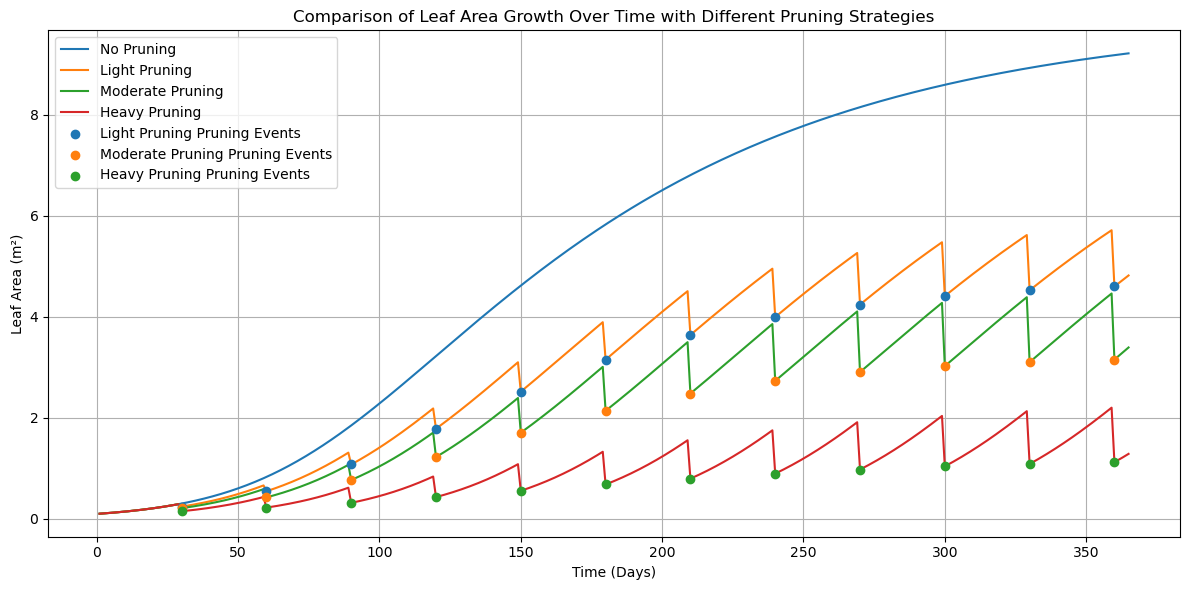

In [4]:
import math
import matplotlib.pyplot as plt

# -------------------------------
# 1. Define Parameters
# -------------------------------

# Environmental Variables (Dotted Line Parameters)
I0 = 20.0          # Incident light (e.g., MJ/m²/day)
k = 0.5            # Beer-Lambert extinction coefficient
A_ground = 1.0     # Ground area occupied by the plant canopy (m²)

# Model Parameters
epsilon = 0.1      # Conversion efficiency from light to biomass
r = 0.05           # Fraction of assimilation allocated to leaf area growth
mu = 0.01          # Leaf area senescence rate (fraction lost per time step)

# Simulation Parameters
T_max = 1095      # Total simulation time steps (e.g., days)

# Add pruning strategies
pruning_strategies = {
    "No Pruning": {"rho": 0.0, "prune_interval": None},
    "Light Pruning": {"rho": 0.2, "prune_interval": 365},
    "Moderate Pruning": {"rho": 0.3, "prune_interval": 365},
    "Heavy Pruning": {"rho": 0.5, "prune_interval": 365},
}

# Initialize results dictionary
results = {strategy: {"time_steps": [], "leaf_areas": []} for strategy in pruning_strategies}

# -------------------------------
# 2. Initialize State Variables
# -------------------------------

LA_initial = 0.1    # Initial leaf area (m²)
LA = LA_initial     # Current leaf area

# -------------------------------
# 3. Simulation Loop
# -------------------------------

for strategy_name, params in pruning_strategies.items():
    LA = LA_initial  # Reset leaf area for each strategy
    print(f"\nRunning simulation: {strategy_name}")
    for t in range(1, T_max + 1):
        # Compute Leaf Area Index (LAI)
        LAI = LA / A_ground
        
        # Compute Intercepted Light using Beer-Lambert
        I_avg = I0 * (1 - math.exp(-k * LAI))
        
        # Compute Photosynthesis (Assimilation)
        A_t = epsilon * I_avg
        
        # Compute Leaf Area Growth
        delta_LA = r * A_t - mu * LA
        
        # Update Leaf Area
        LA += delta_LA
        
        # Ensure Leaf Area doesn't become negative
        LA = max(LA, 0)
        
        # Apply Pruning if applicable
        if params["prune_interval"] and t % params["prune_interval"] == 0:
            LA_before_pruning = LA
            LA *= (1 - params["rho"])
            print(f"Strategy '{strategy_name}': Day {t}: Pruning applied. LA reduced from {LA_before_pruning:.3f} to {LA:.3f} m²")
        
        # Store Results for Plotting
        results[strategy_name]["time_steps"].append(t)
        results[strategy_name]["leaf_areas"].append(LA)

# -------------------------------
# 4. Plot the Results
# -------------------------------

plt.figure(figsize=(12, 6))
for strategy_name, data in results.items():
    plt.plot(data["time_steps"], data["leaf_areas"], label=strategy_name)

# Highlight pruning points only for strategies with pruning
for strategy_name, params in pruning_strategies.items():
    if params["prune_interval"]:
        prune_days = list(range(params["prune_interval"], T_max + 1, params["prune_interval"]))
        prune_LA = [results[strategy_name]["leaf_areas"][day - 1] for day in prune_days]
        plt.scatter(prune_days, prune_LA, label=f'{strategy_name} Pruning Events', zorder=5)

# Adding titles and labels
plt.title('Comparison of Leaf Area Growth Over Time with Different Pruning Strategies')
plt.xlabel('Time (Days)')
plt.ylabel('Leaf Area (m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
